<a href="https://colab.research.google.com/github/Rahul711sharma/Regressions/blob/main/Bias_Variance_Tradeoff_Polynomial_Regression_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## Fit polynomial regression on this dataset for degrees 1 to 10. To do such a regression, consider only one variable and then run polynomial fit and plot the train and test errors w.r.t model complexity. You can also repeat this experiment for all the other variables. Also do not use <code>np.polyfit</code>function, but use the <code>LinearRegression()</code> using the scikit-learn library.</b>

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
%matplotlib inline

In [33]:
boston= load_boston()


In [34]:
bostonData= pd.DataFrame(boston.data)
bostonData.set_axis(boston.feature_names,axis='columns',inplace= True)
bostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
target = boston.target
target.shape
boston.data.shape

(506, 13)

In [36]:
poly_degree = np.arange(1,11)
poly_degree

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [71]:
x,y = bostonData[['RM']],target
regressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)

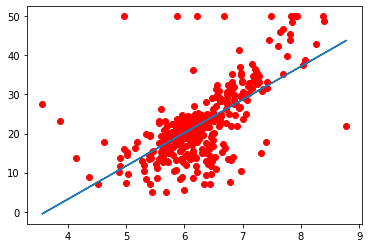

In [73]:
regressor = LinearRegression()
lin_reg = regressor.fit(X_train,y_train)
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,lin_reg.predict(X_train))


In [89]:
train_error = []
test_error = []

for i in poly_degree:
  poly = PolynomialFeatures(degree=i)
  model= poly.fit_transform(X_train)
  lin_reg2 = LinearRegression()
  lin_reg2.fit(model,y_train)
  y_train_predict =lin_reg2.predict(model)
  y_test_predict = lin_reg2.predict(poly.fit_transform(X_test))
  rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_test_predict))
  train_error.append(rmse_train)
  test_error.append(rmse_test)


print(train_error,'\n',test_error)



[6.732285289131297, 6.338222341655302, 6.236968909909077, 6.147330284328664, 5.9683172174579004, 5.961074522454085, 5.960960504989857, 5.959821232430766, 5.959767290832184, 5.94972760258236] 
 [6.259683708636804, 5.667505345943518, 5.66167725425386, 5.697551840917863, 5.8793189407101645, 5.9648205346621195, 5.969091887756144, 5.955001635682196, 5.946487392449614, 5.685547193938734]


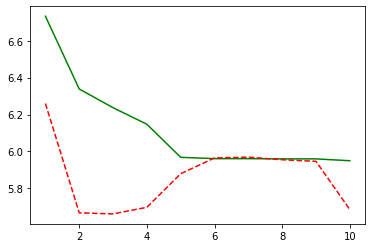

In [91]:
plt.plot(poly_degree,train_error,color='green',label='train_error')
plt.plot(poly_degree,test_error,color='red',linestyle='--',label='train_error')
